In [10]:
#Data Wragling
import pandas as pd
df = pd.read_csv("Customer Purchase.csv")
print(df.head())
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Purchase"] = df["Purchase"].map({"YES": 1, "NO": 0})
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

   Gender  Monthly Income  Brand Awareness  Quality Rating Purchase
0    Male           28000                1               2       NO
1  Female           30000                2               3       NO
2    Male           32000                2               2       NO
3  Female           35000                3               3       NO
4    Male           37000                3               4      YES

Missing Values:
 Gender             0
Monthly Income     0
Brand Awareness    0
Quality Rating     0
Purchase           0
dtype: int64

Basic Statistics:
           Gender  Monthly Income  Brand Awareness  Quality Rating   Purchase
count  80.000000       80.000000        80.000000       80.000000  80.000000
mean    0.500000    51787.500000         4.025000        4.225000   0.800000
std     0.503155    13156.019703         1.211496        1.030853   0.402524
min     0.000000    28000.000000         1.000000        1.000000   0.000000
25%     0.000000    40750.000000         3.000000  

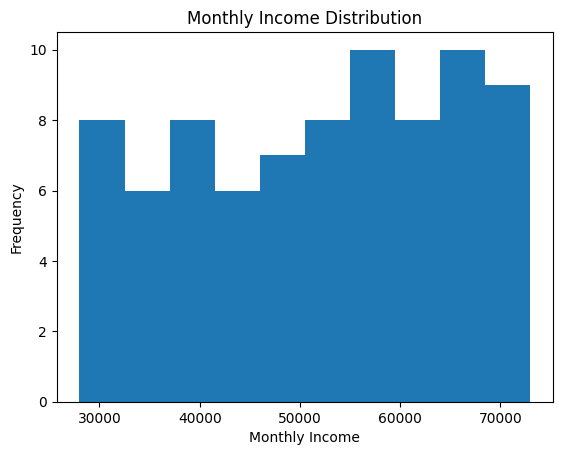

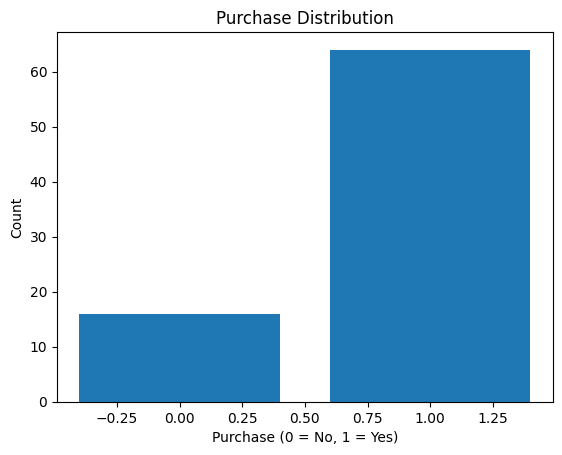

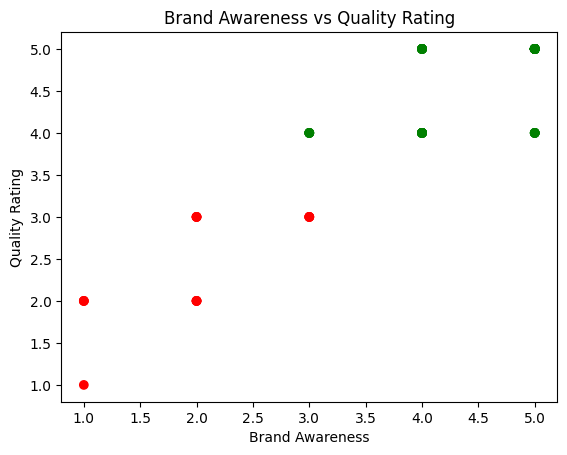

In [11]:
#Data Visualization
import matplotlib.pyplot as plt
plt.hist(df["Monthly Income"], bins=10)
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")
plt.show()
purchase_counts = df["Purchase"].value_counts()
plt.bar(purchase_counts.index, purchase_counts.values)
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Purchase Distribution")
plt.show()
colors = df["Purchase"].map({1: "green", 0: "red"})
plt.scatter(df["Brand Awareness"], df["Quality Rating"], c=colors)
plt.xlabel("Brand Awareness")
plt.ylabel("Quality Rating")
plt.title("Brand Awareness vs Quality Rating")
plt.show()

In [12]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("Purchase", axis=1)
y = df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9375

Confusion Matrix:
 [[ 2  0]
 [ 1 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.93      0.96        14

    accuracy                           0.94        16
   macro avg       0.83      0.96      0.88        16
weighted avg       0.96      0.94      0.94        16



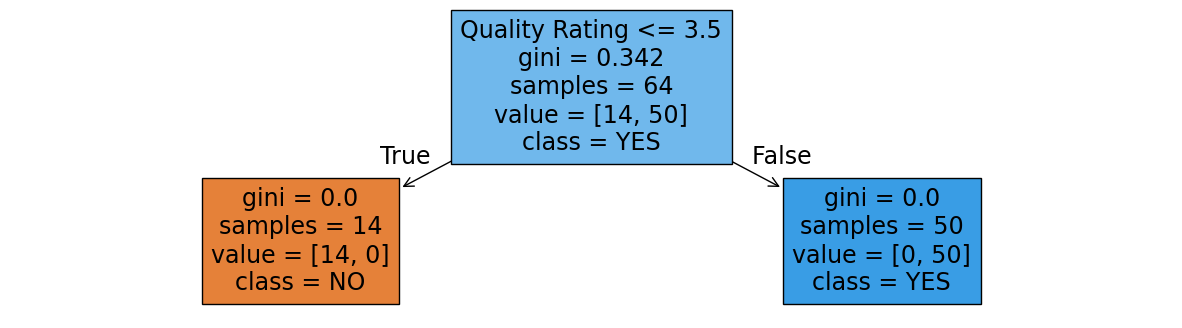

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(15, 4))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["NO", "YES"],
    filled=True
)
plt.show()

Interpretation (for record/exam):

 Logistic Regression is used to model the likelihood of a customer making a purchase based on input features.
 Accuracy represents the proportion of total predictions the model classified correctly.
 The confusion matrix provides a breakdown of true positives, true negatives, false positives, and false negatives.
 Precision measures the reliability of predicted purchases, while recall evaluates the model’s ability to identify actual purchases and non-purchases correctly.


Node Identification:

* Root node: Quality Rating ≤ 3.5, which serves as the main decision criterion of the tree.
* Decision Node: No additional splits are present beyond the root node.
* Terminal nodes:

  * When Quality Rating is ≤ 3.5, the outcome is **Purchase = NO**.
  * When Quality Rating is > 3.5, the outcome is **Purchase = YES**.

Decision rules derived from the tree:

* If the Quality Rating is 3.5 or below, the model predicts that the customer will not make a purchase.
* If the Quality Rating exceeds 3.5, the model predicts that the customer will make a purchase.


1. Why is a decision tree considered more interpretable than logistic regression?

* A Decision Tree clearly shows how decisions are made by splitting data step by step, making the logic easy to follow. In contrast, Logistic Regression uses weighted variables and probability calculations, which are less intuitive for non-technical users.

2. Which model would you suggest to a bussiness manager and why?

* The Decision Tree model is more suitable because it presents decisions in a straightforward manner, is easy to communicate, and allows managers to understand the reasoning behind each prediction.

3.What is effect of increasing the depth of a decision tree excessively?

* An overly deep tree becomes too complex, starts capturing noise instead of patterns, and results in poor performance when applied to unseen data.
